In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Classroom/MachineVision/QUIZ3/"

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 899.5, 599.5, -0.5)

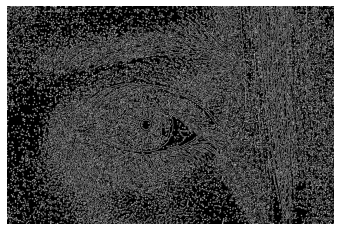

In [141]:
# Import the image
img_path ="/content/gdrive/MyDrive/Classroom/MachineVision/QUIZ3/eye_pupil2."

# Load the image
image = cv2.imread(path + "eye_pupil2.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Gaussian Filter
blur = cv2.GaussianBlur(gray, (15,15), 0)

# Binarize the image using adaptive thresholding
binarized = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Convert the binarized image into an edge map
median_intensity = np.median(binarized)
minVal = int(max(0, (1.0 - 0.33) * median_intensity))
maxVal = int(min(255, (1.0 + 0.33) * median_intensity))
edges = cv2.Canny(binarized, minVal, maxVal)
plt.imshow(edges, cmap='gray')
plt.axis('off')

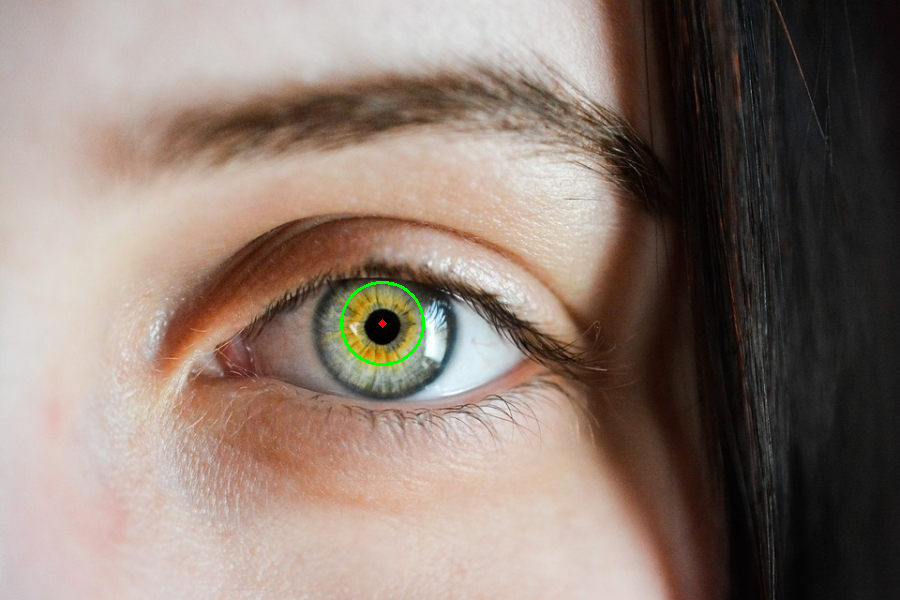

In [142]:
# Perform circular Hough transform to detect the pupil
circles = cv2.HoughCircles(binarized, cv2.HOUGH_GRADIENT, 1, 30, param1=30, param2=80, minRadius=0, maxRadius=100)

# Draw the detected circles on the image
for i in circles[0, :]:
    cv2.circle(image, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
    cv2.circle(image, (int(i[0]), int(i[1])), 2, (0, 0, 255), 3)

# Show the image with the detected circles
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()